In [5]:
required_args = {
    "config_file_path": 'config/test_config.yml',
    "province_short_code": 'MB',
    "resource_type": 'solar'
}
store=f"data/store/solar_resources_{required_args['province_short_code']}.h5"
from linkingtool.hdf5_handler import DataHandler

datahandler=DataHandler(store)

In [6]:
# from linkingtool.AttributesParser import AttributesParser
# from linkingtool.boundaries import GADMBoundaries
# from linkingtool.coders import CODERSData
# from linkingtool.era5_cutout import ERA5Cutout
# from linkingtool.lands import LandContainer
# from linkingtool.CellCapacityProcessor import CellCapacityProcessor
# cell_processor=CellCapacityProcessor(**required_args)
# from linkingtool.timeseries import Timeseries
# ts=Timeseries(**required_args)

from linkingtool import visuals as vis
from workflow.scripts.solar_module_v2 import SolarResources
solar=SolarResources(**required_args)


In [3]:
data1=solar.get_CF_timeseries()
data2=solar.get_cell_capacity()
data3=solar.find_grid_nodes()
data5=solar.score_cells()

2024-10-14 22:24:10,722 - INFO - Loading GADM data for Canada from local datafile data/downloaded_data/GADM/gadm41_Canada_L2.geojson.
2024-10-14 22:24:12,102 - INFO - GADM data for Manitoba saved to data/processed_data/regions/gadm41_Canada_L2_MB.geojson.
2024-10-14 22:24:12,102 - INFO - Building new cutout data/downloaded_data/cutout/MB_2023_2024.nc
2024-10-14 22:24:12,118 - INFO - Storing temporary files in /tmp/tmp42fd220u
2024-10-14 22:24:12,120 - INFO - Calculating and writing with module era5:


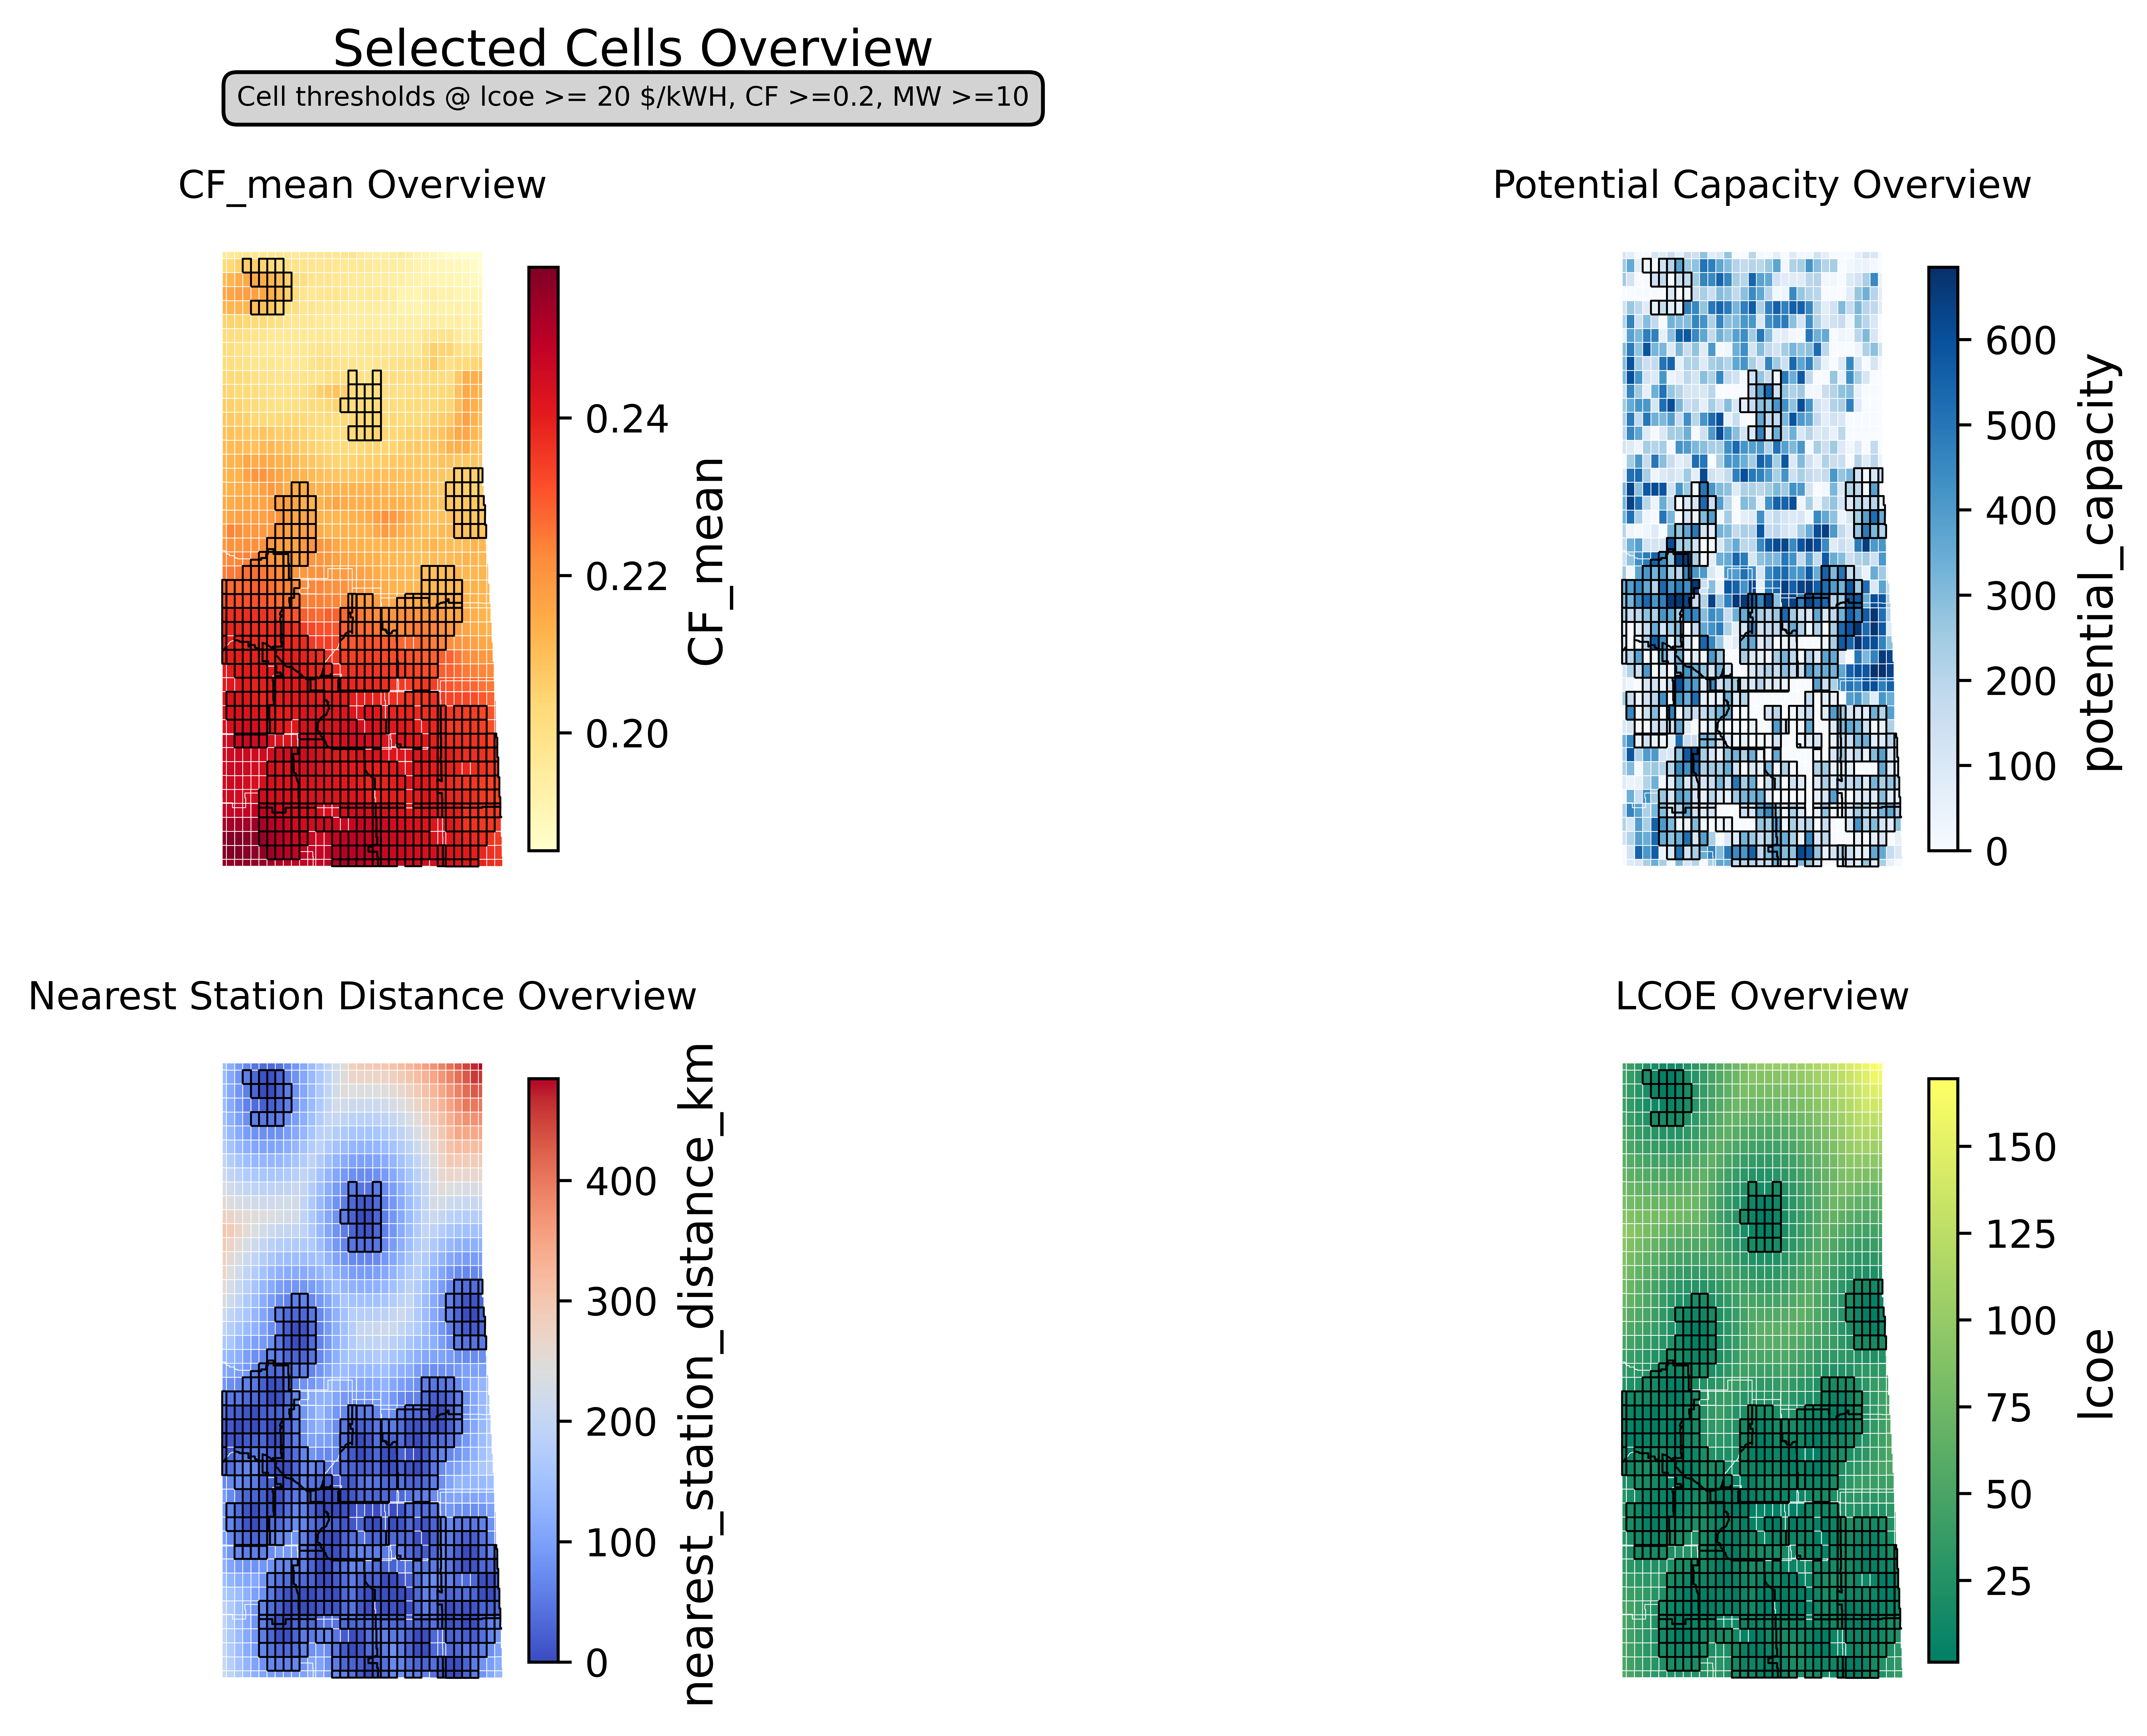

In [4]:
vis.get_matched_vs_missed_visuals(data5, 
                              required_args['province_short_code'],
                              lcoe_threshold=20, 
                              CF_threshold=0.2, 
                              capacity_threshold=10)